In [17]:
#Import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [18]:
#Read the titanic.csv file and inspect the 5 top rows:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Handle missing values
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Fare'].median())


The data is numeric, categoric and with null values. Some data cleaning processes need to happen.

In [52]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
#Checking for sum of null values in each column:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are  alot of null values in the age (177) column and 687 in the cabin column. These could be dropped because they may offer very little in solving the problem of who was likely to survive in the titanic disaster.

In [54]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1]:
"""You can also drop whichever other columns you'd like here
I could drop the Cabin, PessengerId (contributes no new information),
Age (too many null values), Cabin and Embarked columns.
 Trying to drop columns that may not exist in the DataFrame.The reason is 
 that python throws an error when I run the code to drop
columns. It does not find them so i have added a try and except block to supress the orinting of the error."""
#try:
    #titanic_df.drop(['Cabin', 'Ticket', 'PassengerId', 'Name'], axis=1, inplace=True)
#except KeyError:
    # Suppress the error silently
    #pass

# Output the DataFrame to verify the result
#print(titanic_df.head())


"You can also drop whichever other columns you'd like here\nI could drop the Cabin, PessengerId (contributes no new information),\nAge (too many null values), Cabin and Embarked columns.\n Trying to drop columns that may not exist in the DataFrame.The reason is \n that python throws an error when I run the code to drop\ncolumns. It does not find them so i have added a try and except block to supress the orinting of the error."

In [56]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [2]:
#Fill NAN values in age column with mean()
#Fill NAN values in age column with mean()
#titanic_df['Age'].fillna(titanic_df.mean())
# Ensure the 'Age' column is of numeric type (this will convert non-numeric values to NaN)
#titanic_df['Age'] = pd.to_numeric(titanic_df['Age'], errors='coerce')

# Fill NaN values in the 'Age' column with the mean of the 'Age' column
#titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

# Output the DataFrame to verify the result
#print(titanic_df.head())


In [58]:
#Check if age column still has NAN values and the printout shows nno null values.
titanic_df.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [3]:
# Fill NaN values in the 'Age' column with the mean of the 'Age' column
#titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

# Calculate the mode of the 'Embarked' column
#mode_embarked = titanic_df['Embarked'].mode()[0]

# Fill NaN values in the 'Embarked' column with the mode
#titanic_df['Embarked'] = titanic_df['Embarked'].fillna(mode_embarked)

# Output the DataFrame to verify the result
#print(titanic_df.head())

In [60]:
#Check there are no null values and all are clear of null values.
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [61]:
#Check how many rows and then check a sample of the the dataset:
titanic_df.shape

(891, 8)

In [62]:
#Check random values in dataset:
titanic_df.sample(891)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
522,0,3,male,29.699118,0,0,7.2250,C
57,0,3,male,28.500000,0,0,7.2292,C
512,1,1,male,36.000000,0,0,26.2875,S
387,1,2,female,36.000000,0,0,13.0000,S
469,1,3,female,0.750000,2,1,19.2583,C
...,...,...,...,...,...,...,...,...
839,1,1,male,29.699118,0,0,29.7000,C
62,0,1,male,45.000000,1,0,83.4750,S
342,0,2,male,28.000000,0,0,13.0000,S
438,0,1,male,64.000000,1,4,263.0000,S


### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [63]:
#titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [64]:
#Checking counts on Sex and Embarked columns:
#There are 577 male and 314 females. There are two categories of data: male and female.
#titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [23]:
# Encode categorical variables
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = titanic_df[features]
y = titanic_df['Survived']

There are 577 male and 314 females. There are two categories of data: male and female. The two categoric data have been encoded.

In [65]:
#Embarked counts:
#titanic_df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

The Embarked data comes in 3 categories: S, C and Q that need to be encoded.

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [66]:
#titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
#titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,False,True
1,1,1,38.0,1,0,71.2833,C,True,False
2,1,3,26.0,0,0,7.9250,S,True,False
3,1,1,35.0,1,0,53.1000,S,True,False
4,0,3,35.0,0,0,8.0500,S,False,True


In [25]:
# Split the data into training, development, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


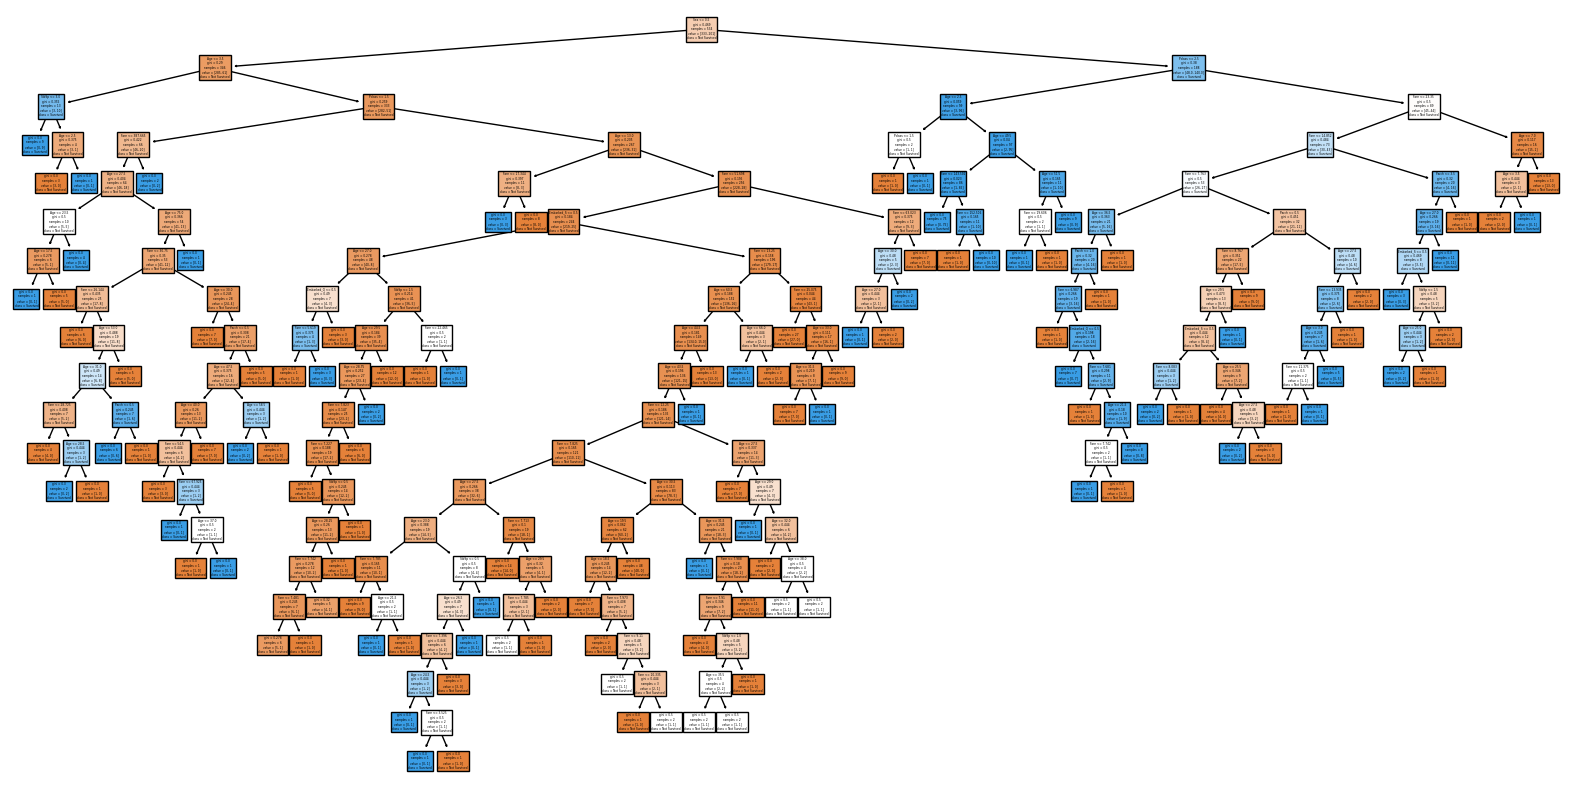

Development Set Accuracy: 0.6910


In [26]:
# Train the decision tree without any depth restriction
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

# Compute accuracy on the development set
y_dev_pred = clf.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print(f'Development Set Accuracy: {dev_accuracy:.4f}')

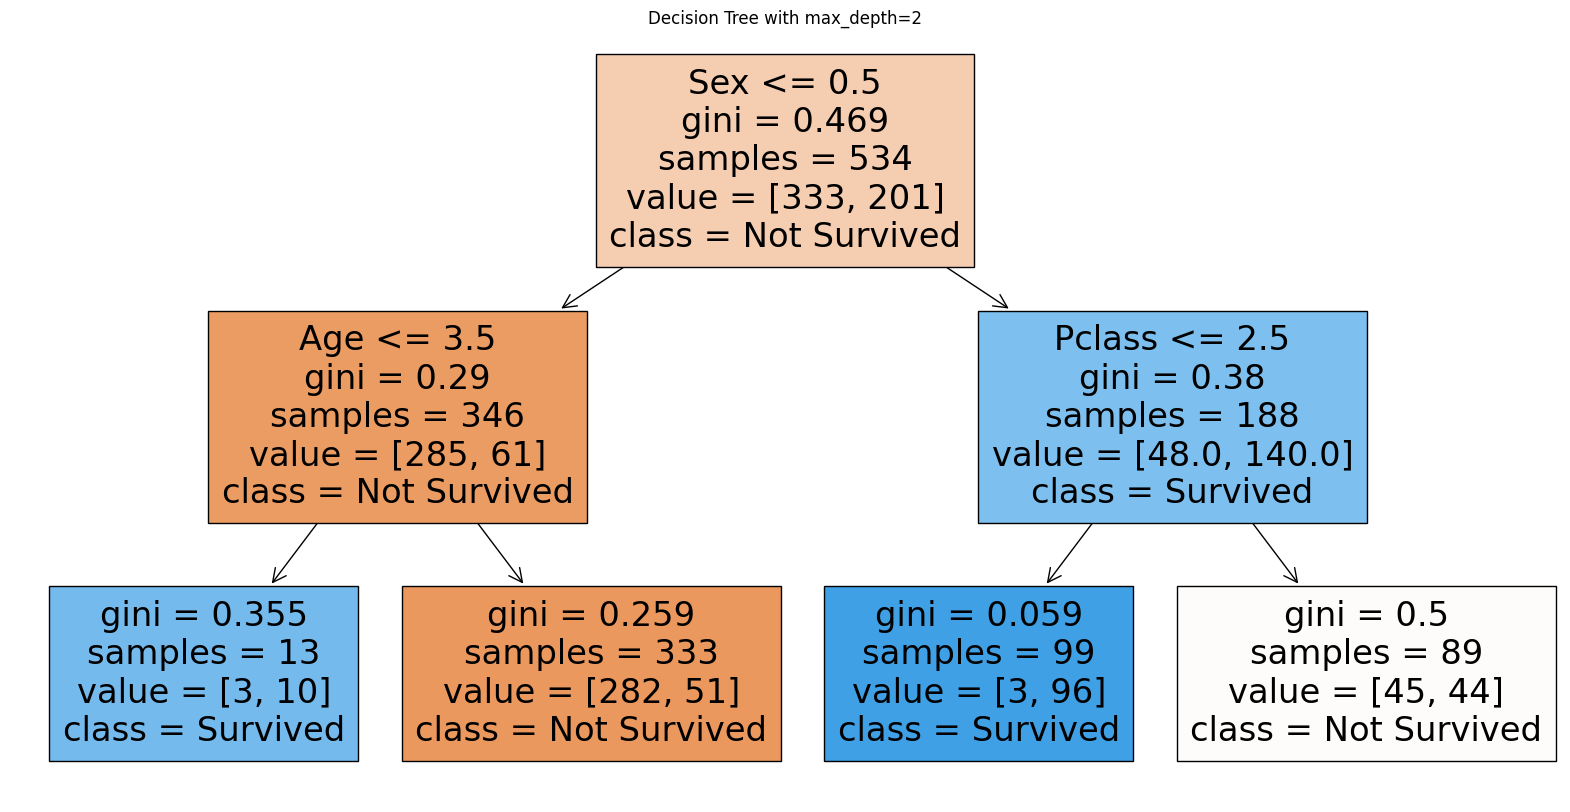

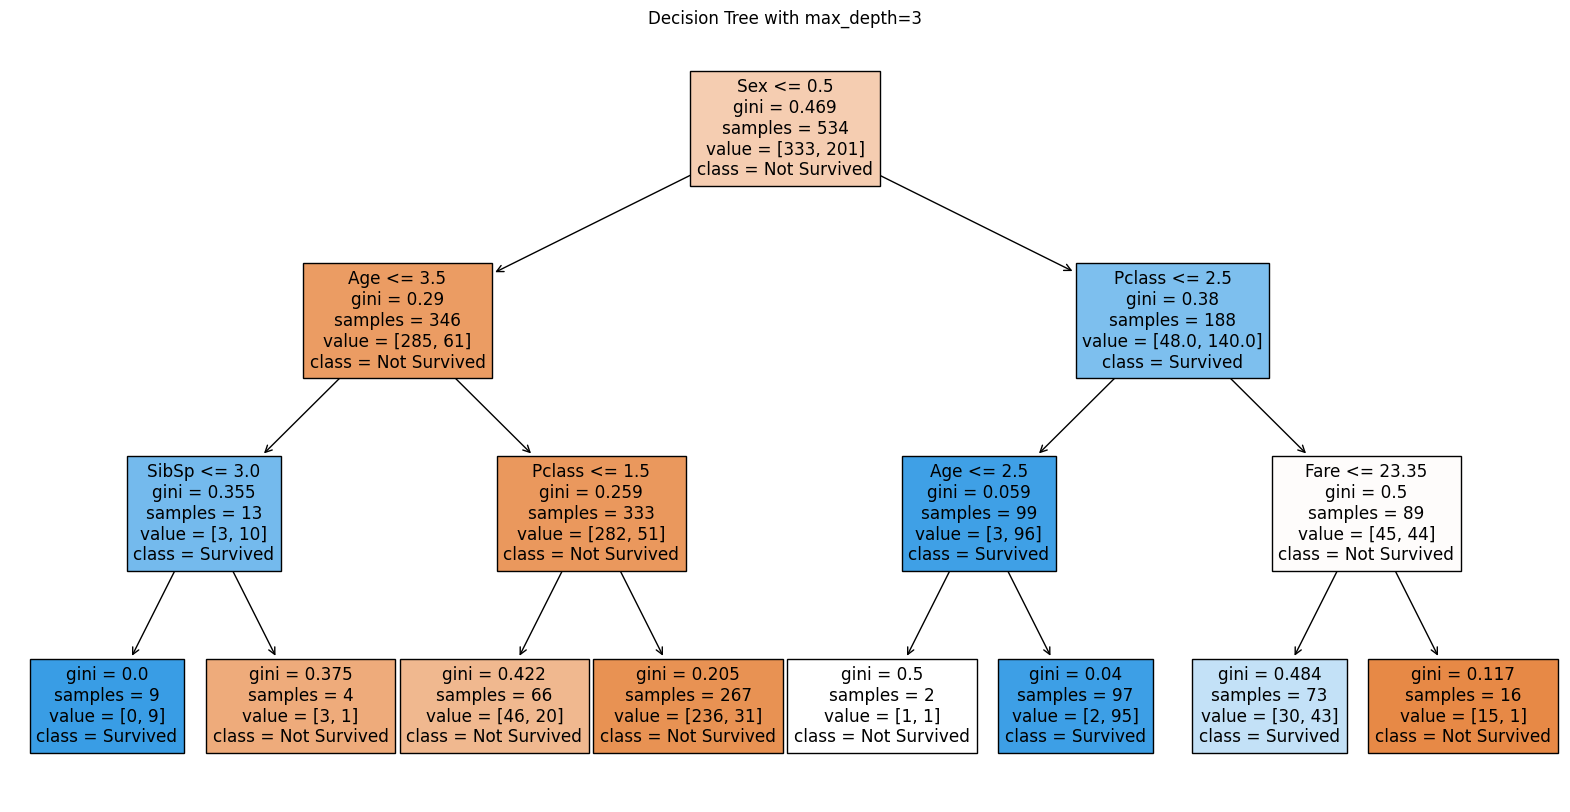

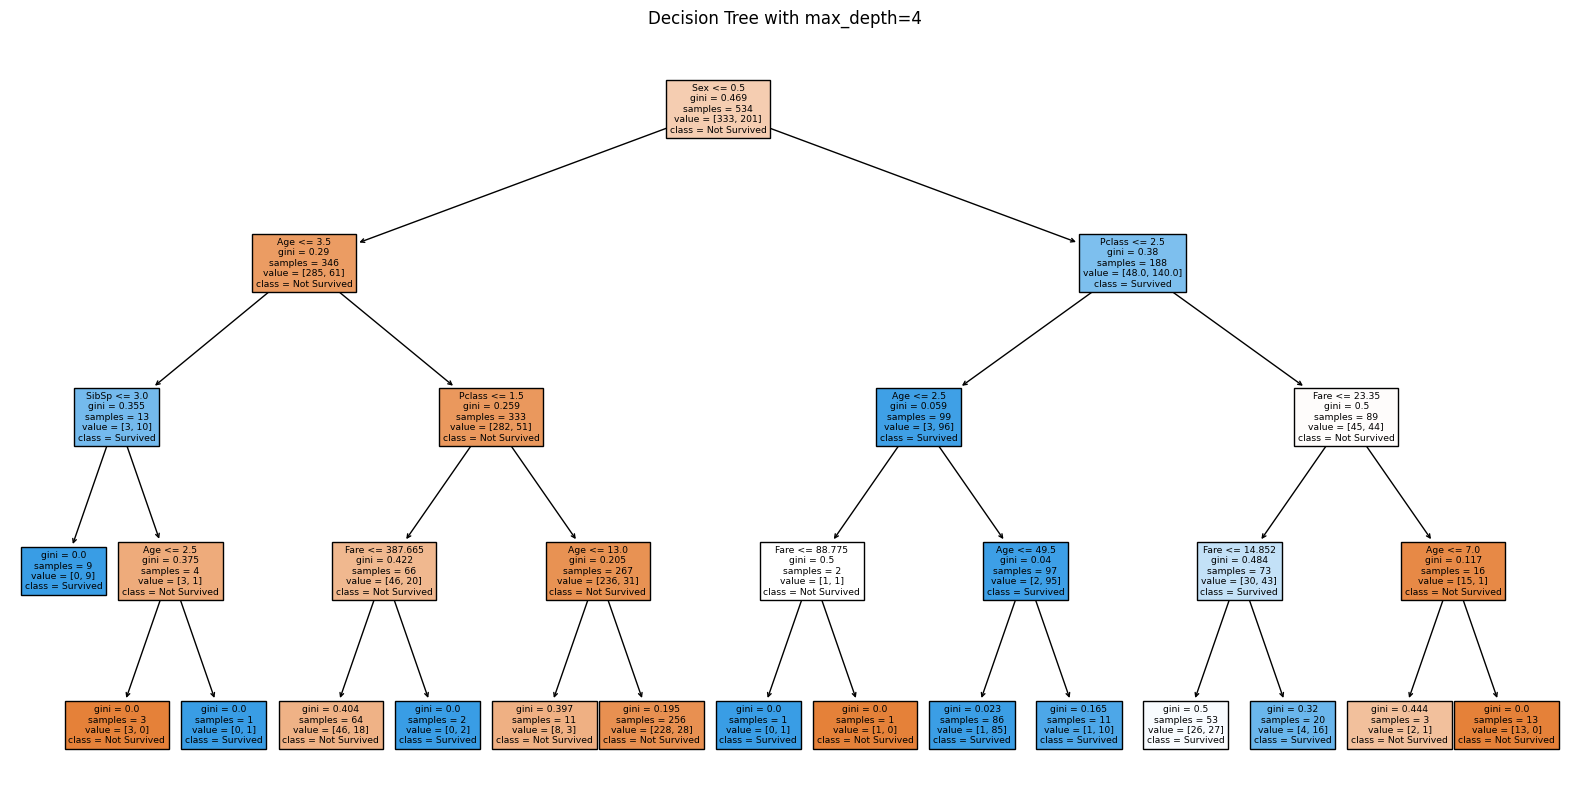

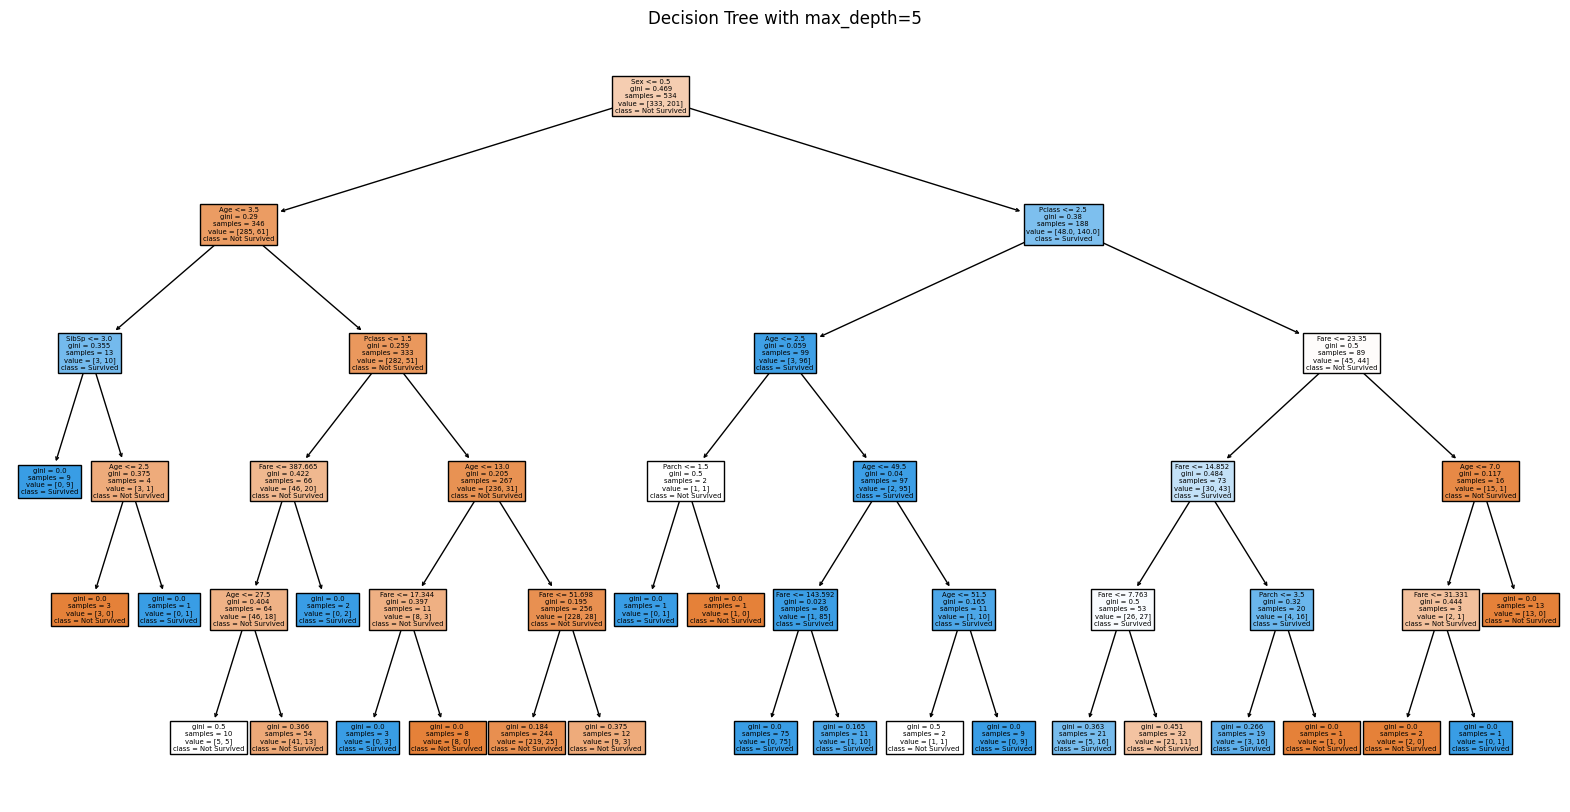

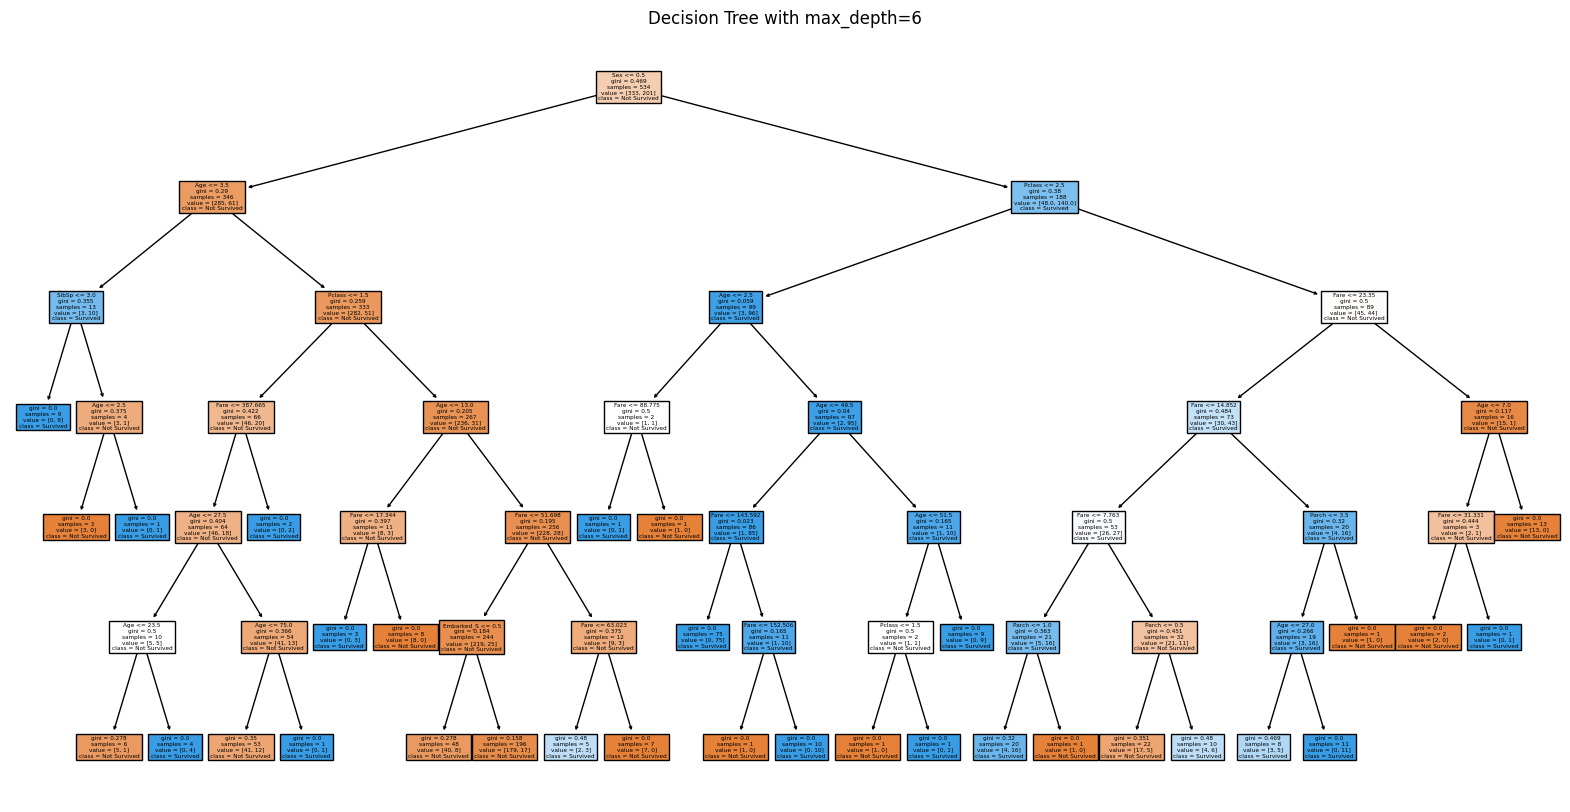

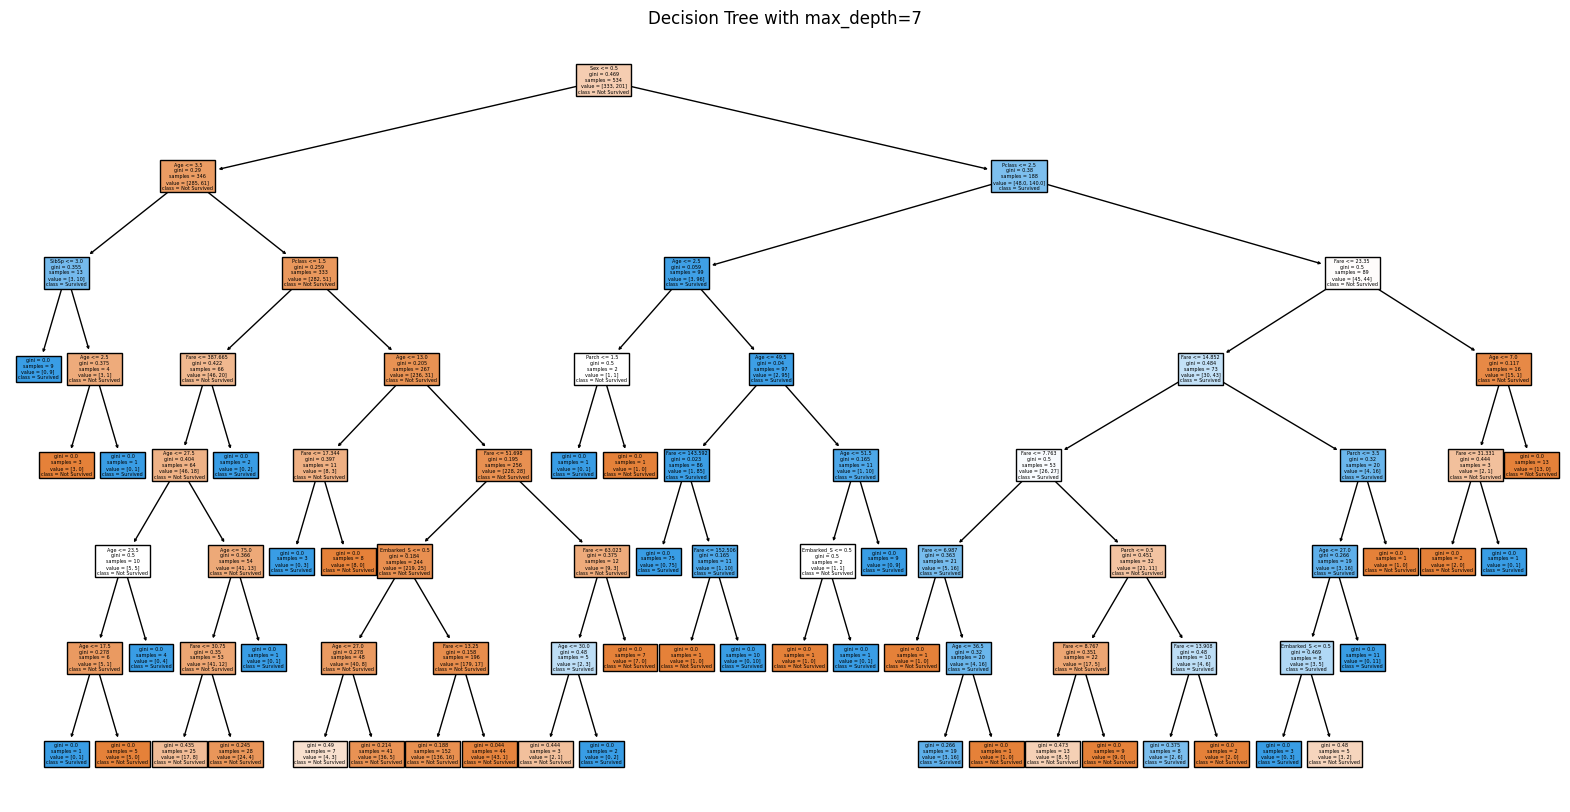

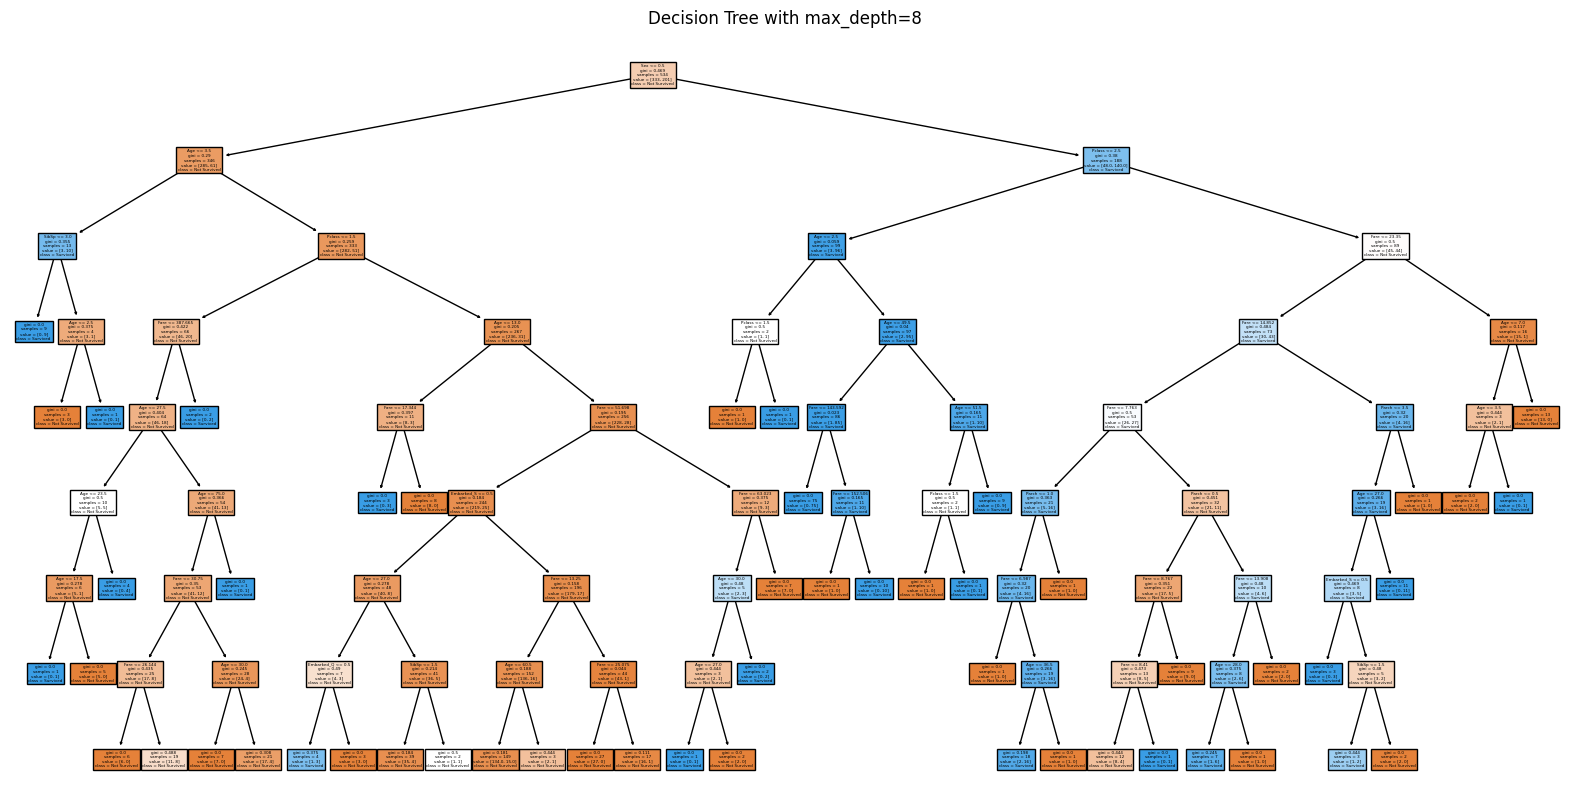

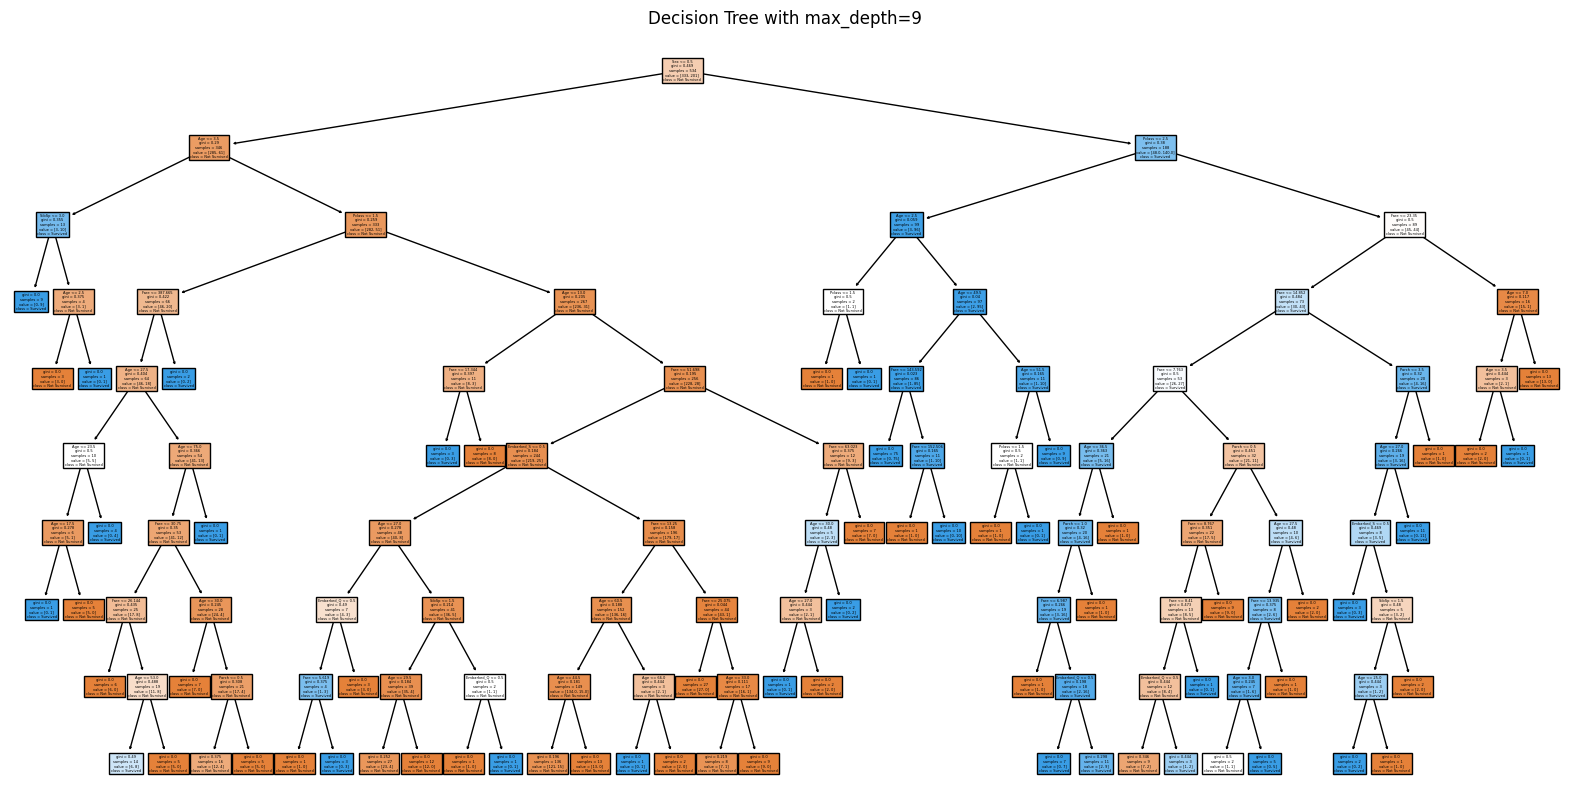

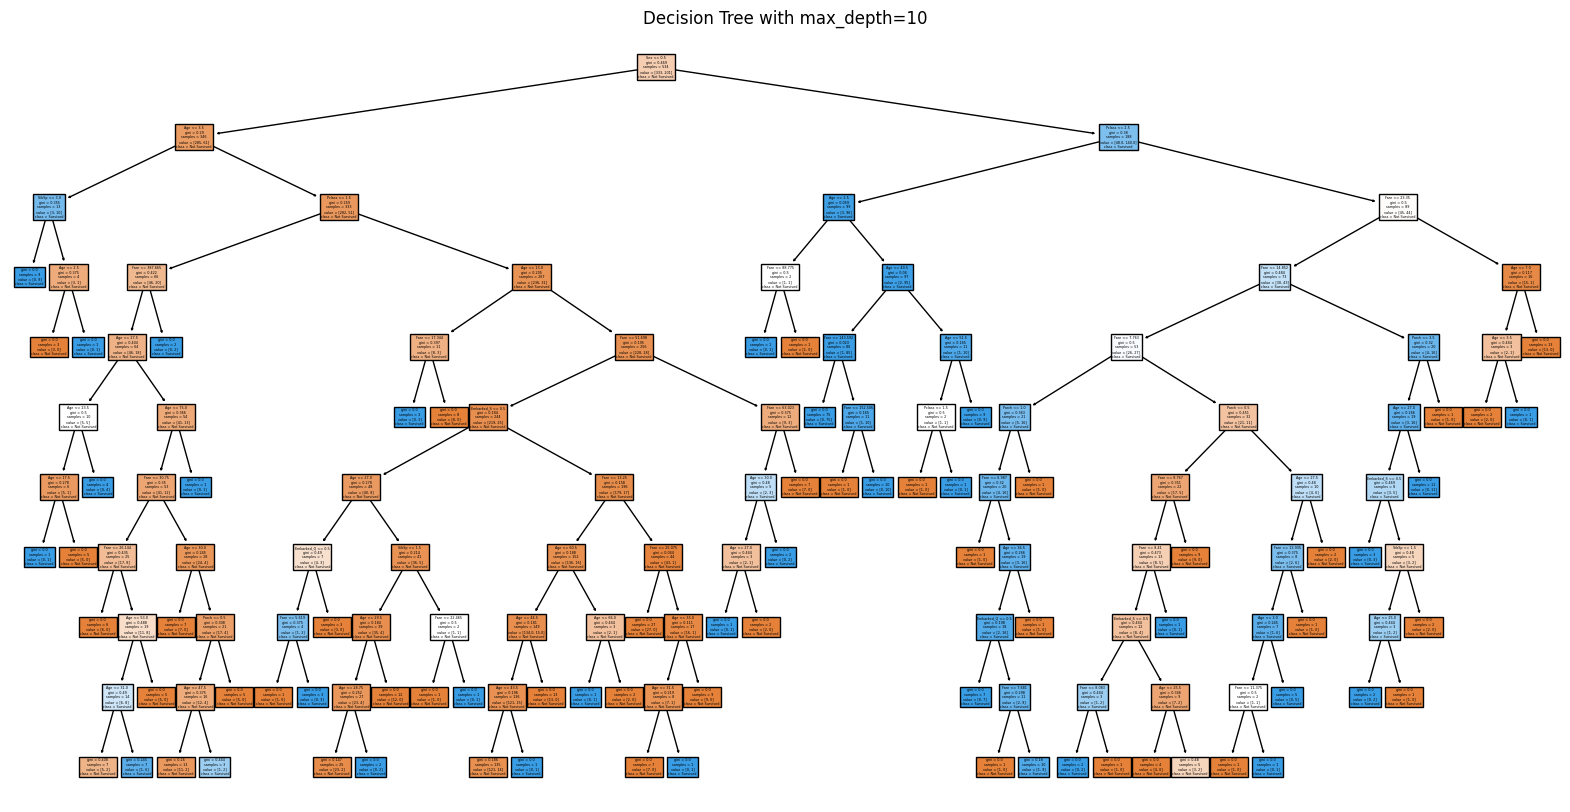

In [27]:
# Initialize lists to store accuracies
train_accuracies = []
dev_accuracies = []
max_depth_values = range(2, 11)

for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Training accuracy
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Development accuracy
    y_dev_pred = clf.predict(X_dev)
    dev_accuracy = accuracy_score(y_dev, y_dev_pred)
    dev_accuracies.append(dev_accuracy)
    
    # Plot the decision tree for the current max_depth
    plt.figure(figsize=(20,10))
    plot_tree(clf, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
    plt.title(f'Decision Tree with max_depth={max_depth}')
    plt.show()

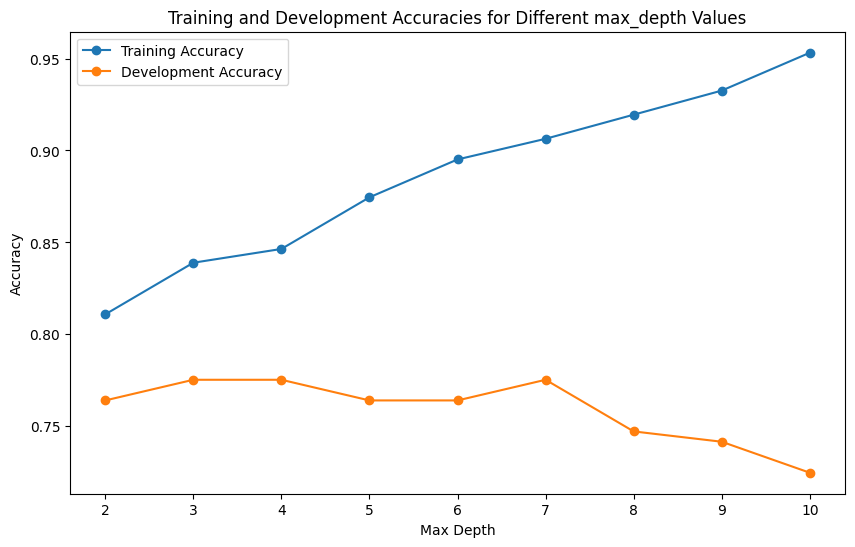

In [28]:
# Plot training and development accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depth_values, dev_accuracies, label='Development Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Development Accuracies for Different max_depth Values')
plt.legend()
plt.show()

In [31]:
# Determine the best max_depth based on development accuracy
best_max_depth = max_depth_values[dev_accuracies.index(max(dev_accuracies))]

# Train the final model with the best max_depth
final_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Set Accuracy of the final model with max_depth={best_max_depth}: {test_accuracy:.4f}')


Test Set Accuracy of the final model with max_depth=3: 0.8212


Training Accuracy Line: Typically increases as max_depth increases. This is because a deeper tree can better fit the training data, capturing more details and nuances. Development Accuracy Line: Usually increases initially, reaches a peak, and then may decline with further increases in max_depth. The peak indicates the optimal complexity for the model. After this point, the model begins to overfit the training data, reducing its generalization ability on unseen data.